# TP1

## Análisis Exploratorio y Preprocesamiento de Datos

### Exploración Inicial

In [1]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

In [2]:
import pandas as pd

properati = pd.read_csv('./properati_argentina_2021.csv')

In [171]:
properati.shape

(460154, 20)

Hay 460154 filas y 20 columnas

In [172]:
properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Mostramos un poco de informacion en general del dataset

In [173]:
properati.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Estos son los tipos de las 20 columnas

In [174]:
properati.isnull().sum()

id                               0
start_date                       0
end_date                         0
created_on                       0
latitud                      40414
longitud                     40414
place_l2                         0
place_l3                     22489
place_l4                    321134
place_l5                    457724
place_l6                    460154
operation                        0
property_type                    0
property_rooms               91656
property_bedrooms           116041
property_surface_total       62341
property_surface_covered     32238
property_price               18001
property_currency            18564
property_title                   0
dtype: int64

Vemos que hay filas con datos faltantes

FILTRADO DE DATASET:

In [15]:
#FILTRADO QUE PIDE EL ENUNCIADO
properati_casa_depto = properati[properati.property_type.isin(['Casa', 'PH','Departamento'])]
properati_zona = properati_casa_depto[properati_casa_depto.place_l2.isin(['Capital Federal'])]
properati_operacion = properati_zona[properati_zona.operation.isin(['Venta'])]
properati_limpio = properati_operacion[properati_operacion.property_currency.isin(['USD'])]
properati_limpio.shape

#FILTRADO DE VALORES NEGATIVOS
indice_negativo=properati_limpio[properati_limpio['property_price']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

indice_negativo=properati_limpio[properati_limpio['property_surface_total']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

indice_negativo=properati_limpio[properati_limpio['property_rooms']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

indice_negativo=properati_limpio[properati_limpio['property_bedrooms']<0].index
properati_limpio.drop(indice_negativo, inplace=True)

C:\Users\agus_\AppData\Local\Temp\ipykernel_2628\461894926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_negativo, inplace=True)
C:\Users\agus_\AppData\Local\Temp\ipykernel_2628\461894926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_negativo, inplace=True)
C:\Users\agus_\AppData\Local\Temp\ipykernel_2628\461894926.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Realizamos filtrado por:
*   Tipo de propiedad
*   Zona, que corresponda a capital
*   Tipo de Operación
*   Tipo de moneda


Tomamos en cuenta que es excluyente que los datos no tengan datos faltantes para realizar este primer filtro
Vemos que el dataframe reduce su tamaño.

In [176]:
#CON ESTE COMANDO SE GUARDA
#properati_limpio2 = pd.DataFrame(properati_limpio)
#properati_limpio2.to_csv('properatilimpio.csv',index = False)

Cambiamos el tipo de dato del atributo place_l6 a object, ya que tiene muchos datos faltantes y como era de tipo float se incluia en todos los analisis de tipo cuantitativo,
dandonos medidas irrelevantes

Cambiamos el tipo de dato de los atributos rooms y bedrooms a int, ya que al ser atributos de tipo cuantitativos discretos (ya que no puede haber por ejemplo 1,5 habitaciones), no queremos que existan numeros decimales en estas columnas

In [4]:
from matplotlib import figure

properati_limpio["place_l6"] = properati_limpio["place_l6"].astype(object)

print(properati_limpio.dtypes) #Esto se debería mostrar?

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                     object
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object


C:\Users\agus_\AppData\Local\Temp\ipykernel_2628\3939459316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio["place_l6"] = properati_limpio["place_l6"].astype(object)


Vemos que las columas *start_date, end_date y created_on* son tipo OBJECT, lo cual decidimos pasarlo a su tipo de dato correspondiente el cual es *datetime*

In [178]:
#properati_limpio['start_date'].unique().size
#properati2 = pd.to_datetime(properati_limpio['start_date'])
#properati2.unique()

In [179]:
print(properati_limpio.describe())

            latitud      longitud  property_rooms  property_bedrooms  \
count  90519.000000  90519.000000    93205.000000       83262.000000   
mean     -34.591481    -58.449795        2.822799           2.014629   
std        0.181719      0.292630        1.426148           1.129767   
min      -53.788624    -71.471192        1.000000          -1.000000   
25%      -34.615975    -58.466522        2.000000           1.000000   
50%      -34.595790    -58.439000        3.000000           2.000000   
75%      -34.577413    -58.408862        4.000000           3.000000   
max      -24.219827    -54.133330       40.000000          70.000000   

       property_surface_total  property_surface_covered  property_price  
count            89405.000000              90895.000000    9.424900e+04  
mean               109.092970                 87.931932    2.262382e+05  
std                980.401976                990.927129    3.186035e+05  
min                 10.000000                  1.000000

Mostramos las medidas de resumen de las variables cuantitativas continuas. Nos interesa principalmente para la cantidad de ambientes y habitaciones, las superficies y el precio de las propiedades.

La cantidad de valores posibles para el tipo de propiedad es 3.


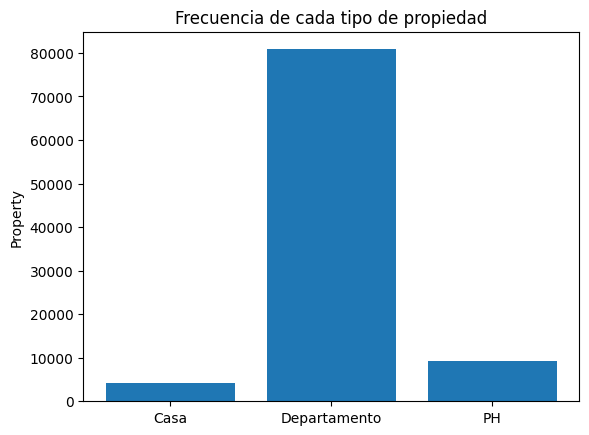

La cantidad de valores posibles para los barrios es 57.


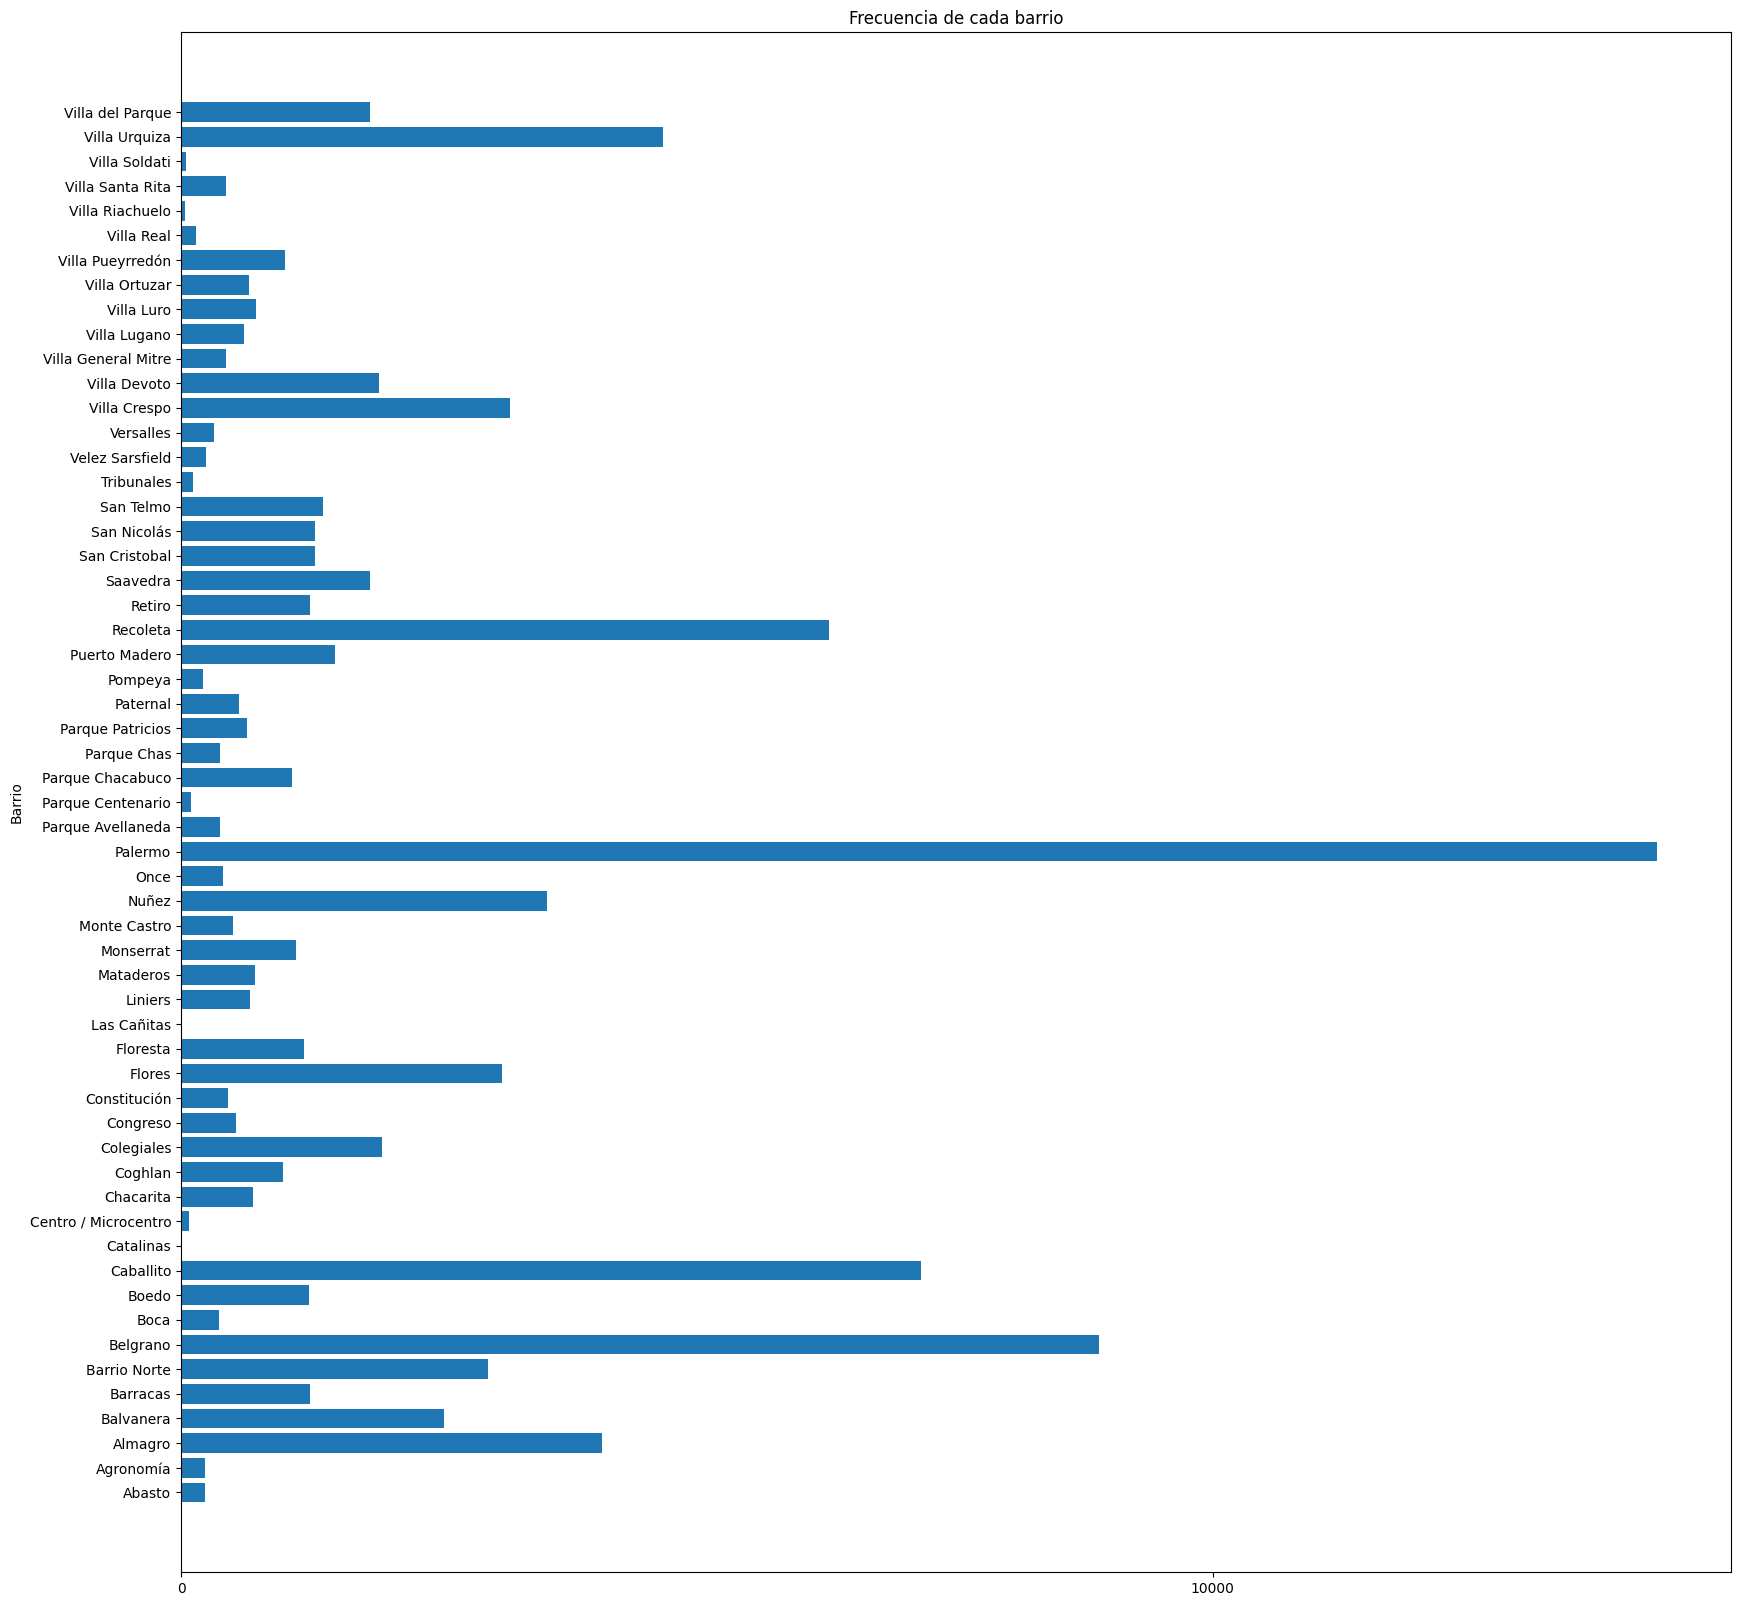

In [180]:
#Se podria agregar una nueva variable la cual se llame STATUS y tenga tres posibles valores: barato, medio o caro. Basandose en el precio de la propiedad
#y separarlos guiandonos por los cuartiles de esta variable

ds_agrupado_property_type=properati_limpio.groupby(['property_type']).count()  #Calculo la frecuencia de cada tipo de propiedad

eje_y = ds_agrupado_property_type["id"].tolist() # Tomamos del ds de tipos de propiedad la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_property_type.index.tolist() # Tomamos todos los tipos de propiedades

print("La cantidad de valores posibles para el tipo de propiedad es " + str(len(eje_x)) + ".")

plt.locator_params('x', nbins=3)
plt.bar(eje_x, eje_y)

plt.ylabel('Property')
plt.title('Frecuencia de cada tipo de propiedad')
 
plt.show()

ds_agrupado_place_l3=properati_limpio.groupby(['place_l3']).count()  #Calculo la frecuencia de cada barrio

eje_y = ds_agrupado_place_l3["id"].tolist() # Tomamos del ds de barrios la columna "id" porque sabemos que todas las propiedades cuentan con ella

eje_x = ds_agrupado_place_l3.index.tolist() # Tomamos todos los posibles barrios

print("La cantidad de valores posibles para los barrios es " + str(len(eje_x)) + ".")

plt.figure(figsize=(20, 20))
plt.locator_params('x', nbins=3)
plt.barh(eje_x, eje_y)
plt.ylabel('Barrio')
plt.title('Frecuencia de cada barrio')
plt.show()

Analizamos las variables cualtiativas, indicando la cantidad de valores posibles y su frecuencia.

In [181]:
properati_limpio.head(5)

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


Observando algunas de las filas del dataset limpio podemos observar que tanto el id como el título de las propiedades son variables irrelevantes para el análisis.

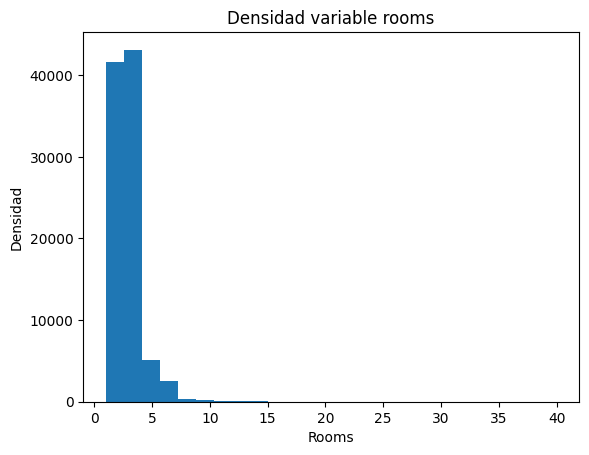

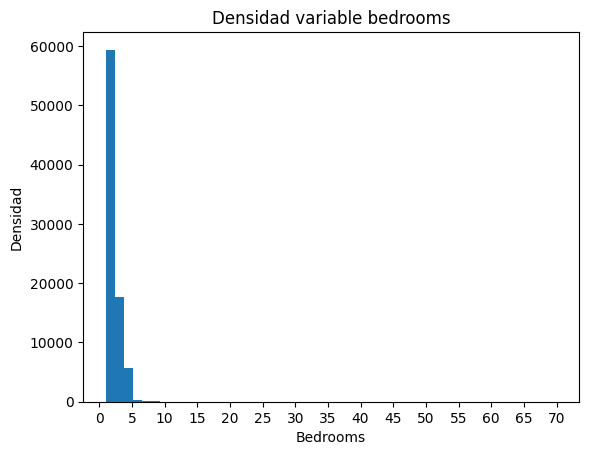

In [16]:
#Distribucion de:

#Ambientes

plt.title('Densidad variable rooms')
plt.hist(properati_limpio['property_rooms'], bins = 25 , alpha = 1)
plt.xlabel("Rooms")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_rooms'], kde=True, alpha = 1).set(title="Densidad variable rooms",xlabel="Rooms",ylabel="Densidad")
#plt.show()

#Habitaciones

plt.title('Densidad variable bedrooms')
plt.hist(properati_limpio['property_bedrooms'],  bins = 50 , alpha = 1)
plt.locator_params("x", nbins=30)
plt.xlabel("Bedrooms")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_bedrooms'], kde=True, alpha = 1).set(title="Densidad variable bedrooms",xlabel="Bedrooms",ylabel="Densidad")
#plt.show()

Ambos graficos de distribucion nos dicen que la cantidad de ambientes y habitaciones ronda entre 0 y 5 en la mayoria de las propiedades. Tambien se observan valores atipicos: Propiedades con 40 ambientes y 70 habitaciones a los que hay que hacerle un tratamiento para que el grafico sea mas claro modificando/eliminando estos valores que hacen complicada la interpretacion del grafico.

Un buen tratamiento para los datos faltantes de las variables del numero de habitaciones y ambientes seria una regresion lineal con el precio de la propiedad, es decir que en base a su precio se calcule la cantidad de ambientes y habitaciones.

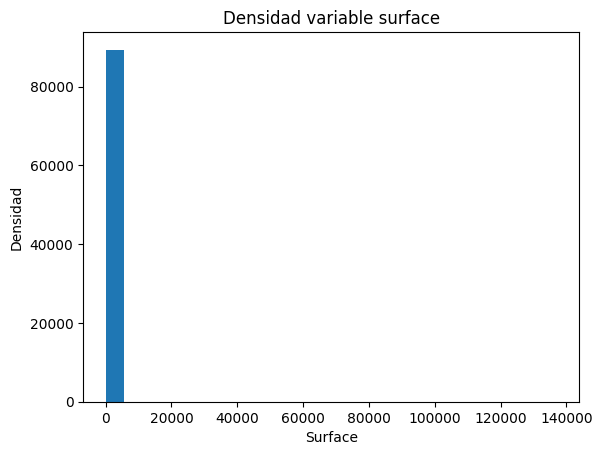

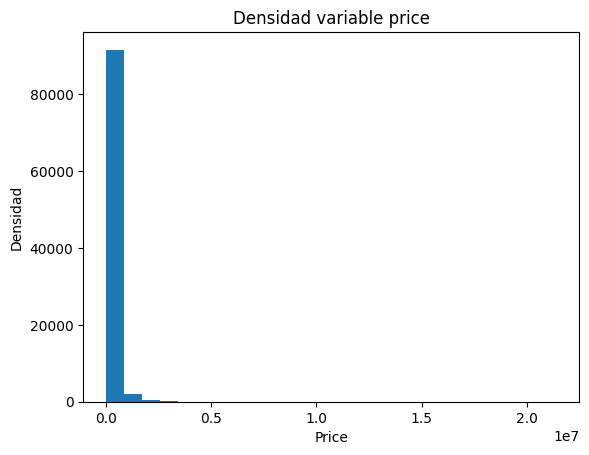

In [17]:
#Superficie
plt.title('Densidad variable surface')
plt.hist(properati_limpio['property_surface_total'], bins = 25 , alpha = 1)
plt.xlabel("Surface")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

#Precio
plt.title('Densidad variable price')
plt.hist(properati_limpio['property_price'], bins = 25 , alpha = 1)
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_price'], kde=True, alpha = 1).set(title="Densidad variable price",xlabel="Price",ylabel="Densidad")
#plt.show()

TODO: Realizar un análisis gráfico de las distribuciones de las variables superficie y precio. (esto ya está hecho arriba no?)


C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\2958638630.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr_properati = properati_limpio.corr()


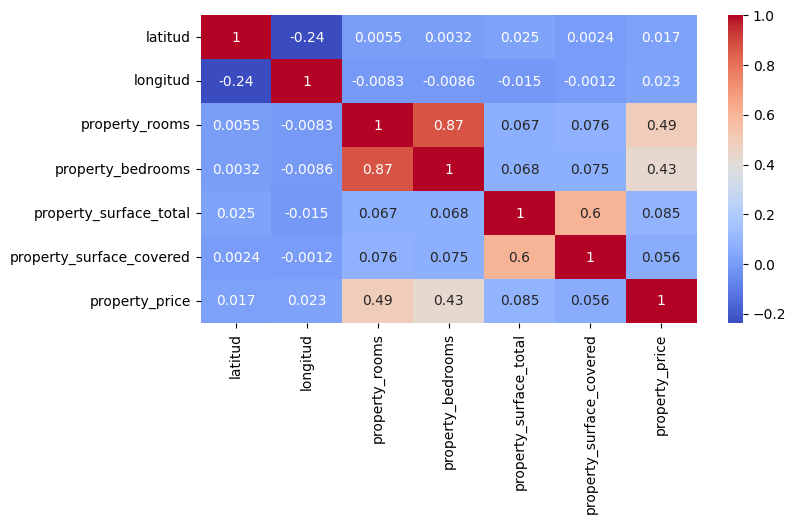

In [184]:
#Heatmap de la correlacion de Pearson entre las variables

matriz_corr_properati = properati_limpio.corr()

plt.figure(figsize = (8,4))
sns.heatmap(matriz_corr_properati, annot = True, cmap='coolwarm')
plt.show()

Como vemos en el mapa de calor las variables de cantidad de habitaciones y cantidad de ambientes estan furtemente correlacionadas ya que el valor de su correlacion de Pearson es cercano a 1.

TODO: A partir de este análisis generar conclusiones sobre los datos.

### Datos Faltantes

DEBATIR CUAL DE LOS 2 SIGUIENTES GRAFICOS ES EL QUE PIDE LA CONSIGNA

<AxesSubplot: xlabel='variables'>

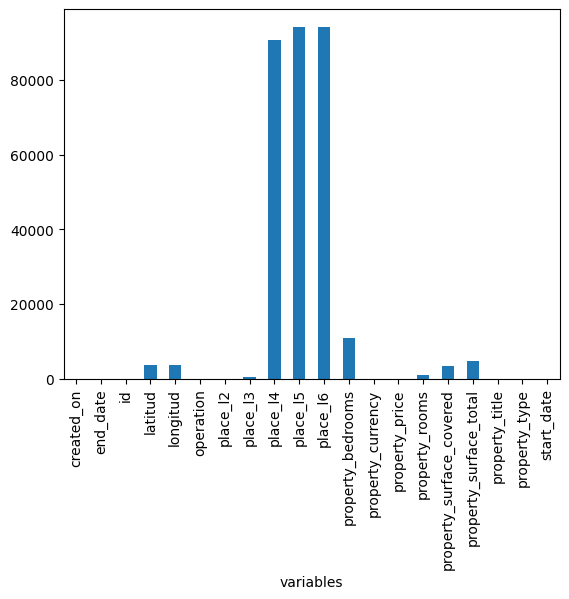

In [185]:
# cantidad de datos faltantes para graficar sobre el total. 

total = len(properati_limpio)

df_datos_faltantes = pd.DataFrame()

df_datos_faltantes['variables'] = ['id','start_date','end_date','created_on','latitud','longitud','place_l2','place_l3','place_l4','place_l5','place_l6','operation','property_type','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price','property_currency','property_title']
df_datos_faltantes['cantidad_datos_faltantes'] = [properati_limpio['id'].isnull().sum(), properati_limpio['start_date'].isnull().sum(), properati_limpio['end_date'].isnull().sum(),properati_limpio['created_on'].isnull().sum(),properati_limpio['latitud'].isnull().sum(), properati_limpio['longitud'].isnull().sum(),properati_limpio['place_l2'].isnull().sum(),properati_limpio['place_l3'].isnull().sum(),properati_limpio['place_l4'].isnull().sum(),properati_limpio['place_l5'].isnull().sum(),properati_limpio['place_l6'].isnull().sum(),properati_limpio['operation'].isnull().sum(),properati_limpio['property_type'].isnull().sum(),properati_limpio['property_rooms'].isnull().sum(),properati_limpio['property_bedrooms'].isnull().sum(),properati_limpio['property_surface_total'].isnull().sum(),properati_limpio['property_surface_covered'].isnull().sum(),properati_limpio['property_price'].isnull().sum(),properati_limpio['property_currency'].isnull().sum(),properati_limpio['property_title'].isnull().sum()]
df_datos_faltantes.groupby('variables')['cantidad_datos_faltantes'].sum().plot(kind='bar')

[Text(0.5, 1.0, 'Porcentaje de datos faltantes por cada variable'),
 Text(0.5, 0, 'Porcentaje de datos faltantes'),
 Text(0, 0.5, 'Variables')]

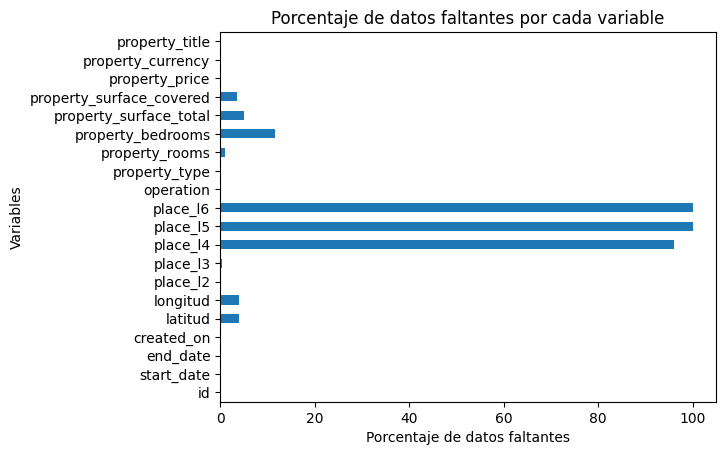

In [186]:
#Porcentaje de datos faltantes por columna
porcentaje_faltante_por_columna = (properati_limpio.isnull().sum()/len(properati_limpio))*100
porcentaje_faltante_por_columna.plot(kind='barh').set(title="Porcentaje de datos faltantes por cada variable", xlabel="Porcentaje de datos faltantes", ylabel="Variables")

Al graficar el porcentaje de datos faltantes por cada variable podemos observar que los valores de place_l4, place_l5, place_l6 se ausentan en la gran mayoría de los casos y que otras columnas como property_bedrooms, property_surface_total, propert_surface_covered, longitud, latitud y property_rooms tienen información faltante en una pequeña cantidad de registros de propiedades. 

In [6]:
## porcentaje datos faltantes por fila

datos_porcentaje_faltante = pd.DataFrame() 
cantidad_variables = 20

for i in range (0,len(properati_limpio)):

  nueva_fila = {'id': i, 'porcentaje_faltante_por_fila':(properati_limpio.iloc[i].isnull().sum().sum()* 100) / cantidad_variables }
  datos_porcentaje_faltante = datos_porcentaje_faltante.append(nueva_fila, ignore_index = True)

C:\Users\agus_\AppData\Local\Temp\ipykernel_1520\1266358964.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos_porcentaje_faltante = datos_porcentaje_faltante.append(nueva_fila, ignore_index = True)
C:\Users\agus_\AppData\Local\Temp\ipykernel_1520\1266358964.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos_porcentaje_faltante = datos_porcentaje_faltante.append(nueva_fila, ignore_index = True)
C:\Users\agus_\AppData\Local\Temp\ipykernel_1520\1266358964.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datos_porcentaje_faltante = datos_porcentaje_faltante.append(nueva_fila, ignore_index = True)
C:\Users\agus_\AppData\Local\Temp\ipykernel_1520\1266358964.py:9: FutureWarning: The frame.append method is depreca

KeyboardInterrupt: 

In [ ]:
datos_porcentaje_faltante.head(5)

,id,porcentaje_faltante_por_fila
0,0.0,30.0
1,1.0,15.0
2,2.0,15.0
3,3.0,20.0
4,4.0,20.0


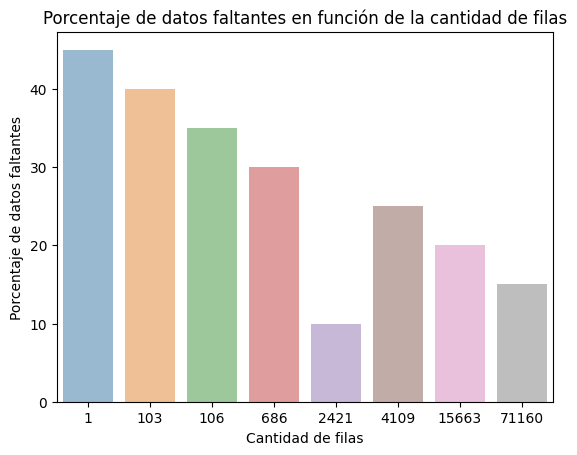

In [ ]:
df_agrupado_porcentaje_faltante_por_fila = datos_porcentaje_faltante.groupby(['porcentaje_faltante_por_fila']).count()  #Calculo la frecuencia de cada porcentaje

eje_y = df_agrupado_porcentaje_faltante_por_fila.index.tolist() 

eje_x = df_agrupado_porcentaje_faltante_por_fila['id'].tolist()

sns_bar_plot =sns.barplot(x=eje_x, y=eje_y, data=df_agrupado_porcentaje_faltante_por_fila ,alpha=0.5).set(title = "Porcentaje de datos faltantes en función de la cantidad de filas", ylabel='Porcentaje de datos faltantes', xlabel='Cantidad de filas')

#datos_porcentaje_faltante['porcentaje_faltante_por_fila'].value_counts().plot.bar(alpha=0.5 , title = "Cantidad de filas con el porcentaje de datos faltantes", xlabel='Porcentaje de datos faltantes', ylabel='Cantidad de filas')
#Esto grafica con los ejes invertidos pero para mi no aporta tanto valor. Lo podemos analizar.


Graficamos el porcentaje de datos faltantes por fila y podemos concluir que éste ronda entre el 10 y el 40% en todos los casos, pero que la mayoría de los registros cuentan con entre un 15 y un 25% de información ausente. Además podemos observar que ninguna fila cuenta con el 100% de los datos completos.

Deducimos que los datos faltantes en los casos de place_l3, place_l4, place_l5 y place_l6 son "Missing At Random" porque estos especifican la ubicacion de las propiedades, por
lo que algunas cuentan con mas informacion que otras. En los casos de las que estan ubicadas en Palermo, existe varios sectores dentro de este barrio (Palermo Viejo, Nuevo, etc) que se pueden especificar en el atributo place_l4 pero por ejemplo barrios mas chicos como Villa Crespo no cuentan con estos sectores, por lo que en esos casos el atributo place_l4 queda nulo.

Luego en los casos de los datos faltantes de latitud, longitud, bedrooms, rooms, surface total y surface covered son "Missing Completely at Random" porque no hay ninguna relacion con los demas datos por la cual faltan.

Por lo que para tratar estos casos de datos faltantes se van a usar distintos metodos de imputacion.

Desarrollamos distintas estrategias para reparar los valores faltantes:

Para los datos de LATITUD Y LONGITUD podriamos usar la ubicacion geografia del barrio en que se encuentran (y si contamos con la ubicacion del sector especifico del barrio mejor) para por medio de datos externos imputar sus coordendas.

Para el caso de BEDROOMS se podria usar el metodo de imputacion de hot deck para deducir este dato a partir de la cantidad de ambientes de la propiedad y tomar su valor mas frecuente de dormitorios, o la media, etc. Lo mismo pero al reves para los valores faltantes de ROOMS.

Ahora bien para el caso de SUPERFACE (TOTAL y COVERED) al ser valores cuantitativos continuos podemos utilizar la imputacion por regresion y en este caso multiple, utilizando a los atributos de precio, habitaciones y dormtorios como covariables para crear el modelo predictor.

In [18]:
import numpy as np
from sklearn.impute import KNNImputer

datos_rooms_bedrooms = {"rooms":properati_limpio["property_rooms"], "bedrooms":properati_limpio["property_bedrooms"]}

df_rooms_bedrooms = pd.DataFrame(datos_rooms_bedrooms)

imputer = KNNImputer(n_neighbors=5)
#datos_imputados = imputer.fit_transform(df_rooms_bedrooms) #devuelve una lista de listas
imputer.fit(df_rooms_bedrooms)
datos_imputados = imputer.transform(df_rooms_bedrooms)


df_imputado_rooms_bedrooms = pd.DataFrame(datos_imputados, columns=["property_rooms", "property_bedrooms"], index=[properati_limpio.index])

properati_limpio['tmp'] = np.arange(0, 0 + len(properati_limpio)) + 1
df_imputado_rooms_bedrooms['tmp'] = np.arange(0, 0 + len(df_imputado_rooms_bedrooms)) + 1

properati_limpio = properati_limpio.drop(['property_rooms'], axis=1)
properati_limpio = properati_limpio.drop(['property_bedrooms'], axis=1)

properati_limpio = pd.merge(properati_limpio, df_imputado_rooms_bedrooms, how="inner", on="tmp")

properati_limpio = properati_limpio.drop(['tmp'], axis=1)

print(properati_limpio.shape)




#properati_limpio["property_rooms"] = df_imputado_rooms_bedrooms["rooms"]
#properati_limpio["property_bedrooms"] = df_imputado_rooms_bedrooms["bedrooms"]
#No me deja reemplazar las columnas del dataframe por otras (por las imputadas), de esta manera

#columnas_rooms_bedrooms = ["property_rooms", "property_bedrooms"]
#properati_limpio.drop(labels=columnas_rooms_bedrooms, axis="columns", inplace=True)

#properati_limpio[columnas_rooms_bedrooms] = df_imputado_rooms_bedrooms["rooms", "bedrooms"]

#Tampoco me deja eliminar y volver a poner columnas nuevas


print(f'Cantidad de datos faltantes en el atributo bedrooms:  {df_imputado_rooms_bedrooms["property_bedrooms"].isnull().sum()} \n Cantidad de datos faltanes en el atributo rooms: {df_imputado_rooms_bedrooms["property_rooms"].isnull().sum()}')

print(f'Cantidad de datos faltantes en el atributo bedrooms:  {properati_limpio["property_bedrooms"].isnull().sum()} \n Cantidad de datos faltanes en el atributo rooms: {properati_limpio["property_rooms"].isnull().sum()}')#Como vemos, la imputacion sirvio y ninguna de las dos columnas tienen datos faltantes

(94248, 20)
Cantidad de datos faltantes en el atributo bedrooms:  0 
 Cantidad de datos faltanes en el atributo rooms: 0
Cantidad de datos faltantes en el atributo bedrooms:  0 
 Cantidad de datos faltanes en el atributo rooms: 0


C:\Users\agus_\AppData\Local\Temp\ipykernel_2628\1740842762.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio['tmp'] = np.arange(0, 0 + len(properati_limpio)) + 1


In [7]:
#Modelo predictor de las variables de superficie
modelo_lineal_multiple_surface = LinearRegression()

variables_independientes = ["property_price", "property_rooms"]

variables_independientes_entrenamiento = properati_limpio[variables_independientes]
variables_independientes_entrenamiento = variables_independientes_entrenamiento.drop(variables_independientes_entrenamiento.tail(4844).index, axis=0)
#Se eliminan 4844 porque son la cantidad de muestras que tiene valor nulo en el atributo surface, por lo que se sacan para poder entrenar al modelo correctamente 

notnull_surface = properati_limpio["property_surface_total"].notnull()
properati_notnull_surface = properati_limpio[notnull_surface]

variable_dependiente_predecir = properati_notnull_surface["property_surface_total"].values.reshape(-1,1)

print(variables_independientes_entrenamiento.shape)
print(len(variable_dependiente_predecir))


modelo_lineal_multiple_surface.fit(variables_independientes_entrenamiento, variable_dependiente_predecir)

b1 = round(modelo_lineal_multiple_surface.coef_[0][0],2)
b2 = round(modelo_lineal_multiple_surface.coef_[0][1],2)
b0 = round(modelo_lineal_multiple_surface.intercept_[0], 2)

print(f"Modelo lineal multiple: surface_total = {b1}*precio +  {b2}*habitaciones + *ambientes + {b0}")

#METRICAS
r2 = modelo_lineal_multiple_surface.score(variables_independientes_entrenamiento,variable_dependiente_predecir)
print(f"El r2 del modelo multiple es: {r2}")

#No estima bien, asi que podriamos intentar hacer un hot deck con surface_covered

(89405, 2)
89405
Modelo lineal multiple: surface_total = -0.0*precio +  -1.07*habitaciones + *ambientes + 113.36
El r2 del modelo multiple es: 8.217701645385489e-06


TODO: En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

Esto habria que hacerlo para ver si la distribucion del atributo cambio mucho o no, dependiendo la manera en que se imputaron valores faltantes

### Valores atípicos

#### Análisis univariado

Utilizaremos el Análisis de Box-Plot para identificar y eliminar los outliners.

##### Property rooms

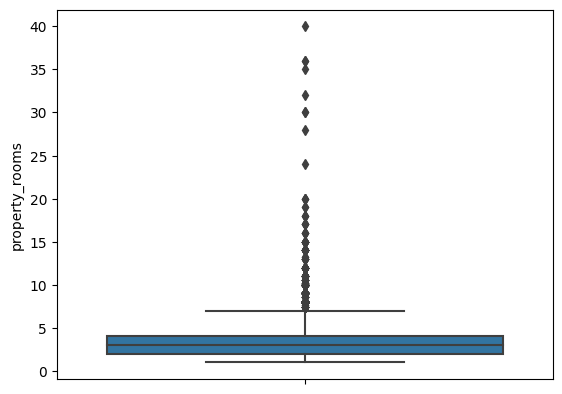

In [16]:
sns.boxplot(y=properati_limpio.property_rooms)
plt.show()

Podemos observar que existen outliers univariados en la variable Property Rooms y que son aquellos que tienen un valor mayor a siete. Procedemos a identificarlos y eliminarlos del DataFrame.

In [17]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_rooms']>10]
outlier.shape

(144, 20)

In [18]:
#Eliminación de outlier por ínidce de fila
indice_outlier=outlier.index
properati_limpio.drop(indice_outlier, inplace=True)

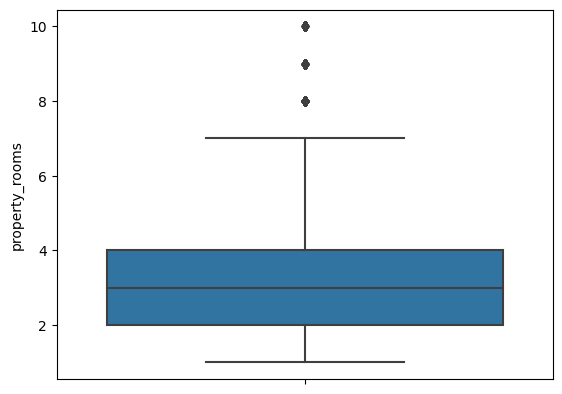

In [191]:
sns.boxplot(y=properati_limpio.property_rooms)
plt.show()

Graficamos nuevamente y observamos que continúan habiendo outliers esta vez con un valor mayor a siete, así que repetimos el proceso.

In [9]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_rooms']>7]
outlier.shape

(796, 20)

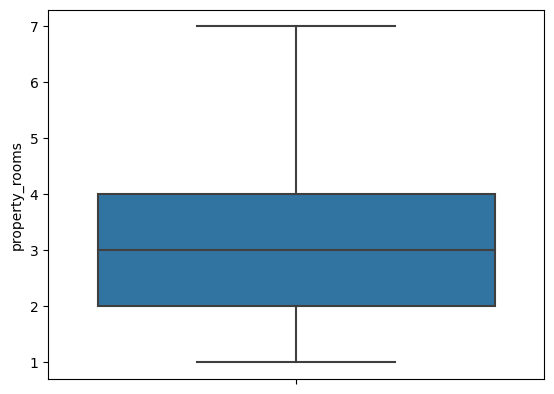

In [10]:
#Eliminación de outlier por ínidce de fila
indice_outlier=outlier.index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_rooms)
plt.show()

Ahora observamos que en el gráfico no se muestran outliers.

Además probamos que sucedería si en vez de utilizar el Análisis de Box-Plot, hubiesemos aplicado Z-Score.

In [21]:
#z-score Property Rooms
media_property_rooms=np.mean(properati_limpio.property_rooms)
std_property_rooms=np.std(properati_limpio.property_rooms)
properati_limpio['z_property_rooms']=(properati_limpio.property_rooms - media_property_rooms)/std_property_rooms

In [195]:
properati_limpio[properati_limpio['z_property_rooms']>3]

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,...,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,z_property_rooms
713,c4Br1n7YV3leBERmt/ZCjA==,2021-09-09,2022-01-27,2021-09-09,-34.624001,-58.495140,Capital Federal,Floresta,NaN,NaN,...,Venta,PH,7.0,4.0,201.0,111.0,250000.0,USD,Venta de 2 PH Tipo casa y local en Floresta/C...,3.350037
816,J4k6mcS3gHoFlin7DHZFAQ==,2021-09-09,2022-02-09,2021-09-09,-34.588526,-58.384700,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,7.0,4.0,295.0,295.0,1250000.0,USD,"Retasado! Imponente piso alto,7amb.Recoleta.",3.350037
2619,irs2CsqOGTpruev4W0AW7A==,2021-12-17,2022-01-25,2021-12-17,-34.586276,-58.394551,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,7.0,4.0,300.0,250.0,690000.0,USD,Departamento de 4 dormitorios con cochera dobl...,3.350037
4274,0i2XPPxJHx02A17ME3zgXw==,2021-09-20,2021-12-15,2021-09-20,-34.621206,-58.470878,Capital Federal,Flores,NaN,NaN,...,Venta,Casa,7.0,3.0,395.0,283.0,299000.0,USD,Casa - Flores,3.350037
4833,oCx8OZ1wXznR3ncSym2QpA==,2021-09-20,2022-02-16,2021-09-20,-34.579411,-58.410668,Capital Federal,Palermo,NaN,NaN,...,Venta,Departamento,7.0,5.0,300.0,300.0,2300000.0,USD,Torre Camps Ugarteche . 7 amb. 4 Suites . Impr...,3.350037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459713,WVGAthhE8wJB53dWs+WtSg==,2021-01-05,9999-12-31,2021-01-05,-34.595836,-58.386318,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,7.0,3.0,271.0,271.0,590000.0,USD,Departamento en venta en Recoleta,3.350037
459723,E1niIZljL8Hvu2JiZ3et4A==,2021-01-05,2021-06-01,2021-01-05,-34.594992,-58.385721,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,7.0,3.0,203.0,203.0,585000.0,USD,Departamento de 3/4 dormitorios en venta en Re...,3.350037
459726,bJ0RBziOfbX7xlYfIDOmWA==,2021-01-05,2021-06-05,2021-01-05,-34.594887,-58.382749,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,7.0,4.0,289.0,289.0,645000.0,USD,Excelente departamento frances en venta en Re...,3.350037
459752,7OiRggsgG0+5d3oG9fPeRA==,2021-01-05,2021-03-02,2021-01-05,-34.590972,-58.391181,Capital Federal,Recoleta,NaN,NaN,...,Venta,Departamento,7.0,4.0,248.0,248.0,790000.0,USD,Departamento en venta en Recoleta,3.350037


En total eliminamos 740 outliers que tenian un valor en property_rooms mayor a 7.

##### Property bedrooms

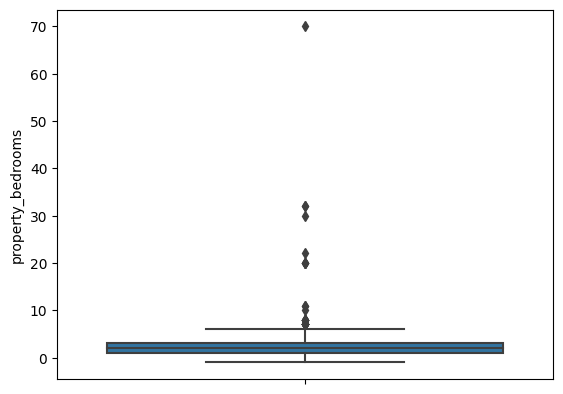

In [22]:
sns.boxplot(y=properati_limpio.property_bedrooms)
plt.show()

Existen outliers univariados en la variable Property bedooms.

In [11]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_bedrooms']>10]
outlier.shape

(11, 20)

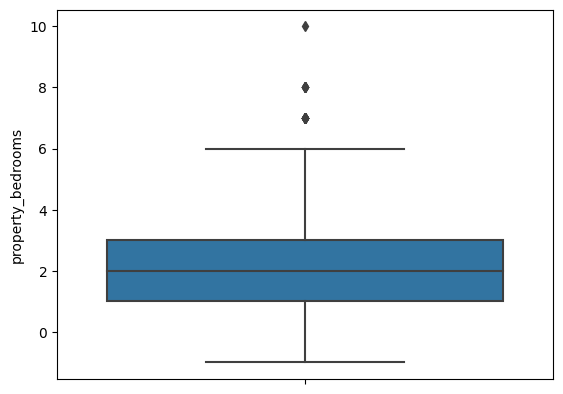

In [12]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_bedrooms']>10].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_bedrooms)
plt.show()

In [13]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_bedrooms']>6]
outlier.shape

(23, 20)

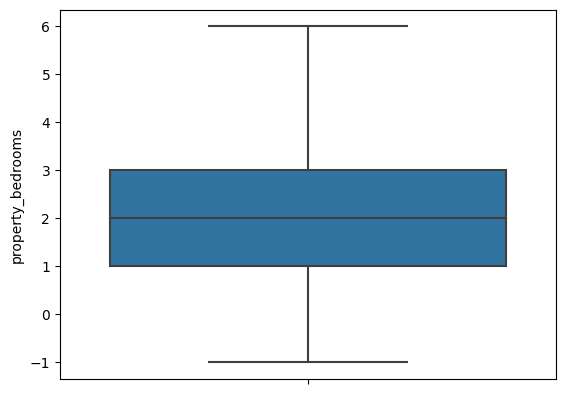

In [14]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_bedrooms']>6].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_bedrooms)
plt.show()

En total eliminamos 68 outliers que tenian un valor en property_bedrooms mayor a 6.

##### Property surface total

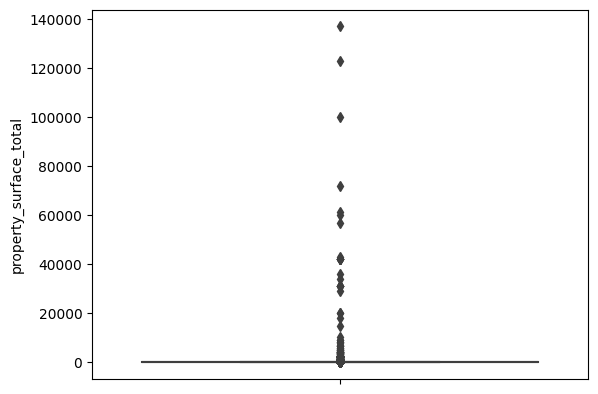

In [201]:
sns.boxplot(y=properati_limpio.property_surface_total)
plt.show()

Existen outliers univariados en la variable Property surface total con valores mayores a 20.000 en principio.


In [202]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>20000]
outlier.shape

(26, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\1930979905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


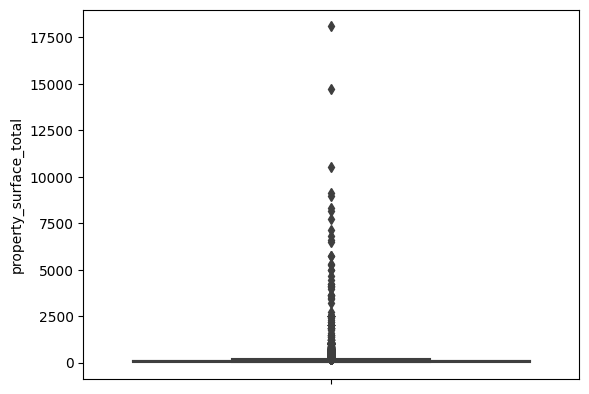

In [203]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>20000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)
plt.show()

In [204]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>2500]
outlier.shape

(35, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\2228625668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


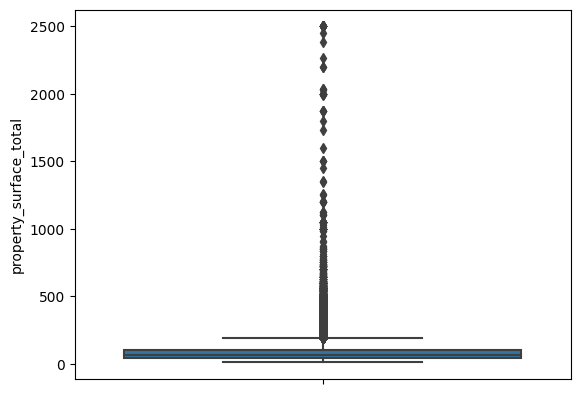

In [205]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>2500].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)
plt.show()

In [206]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>500]
outlier.shape

(384, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\1820007266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


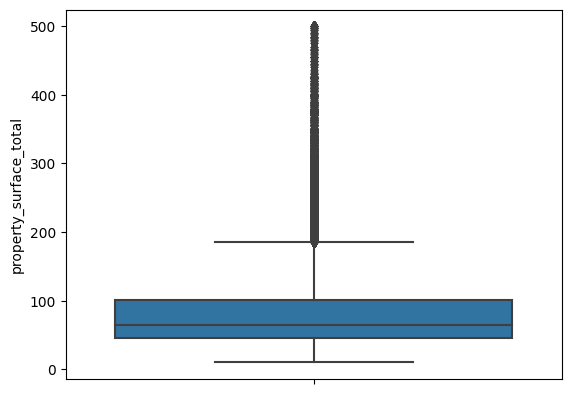

In [207]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>500].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)
plt.show()

In [208]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>200]
outlier.shape

(5800, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\2327776996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


<AxesSubplot: ylabel='property_surface_total'>

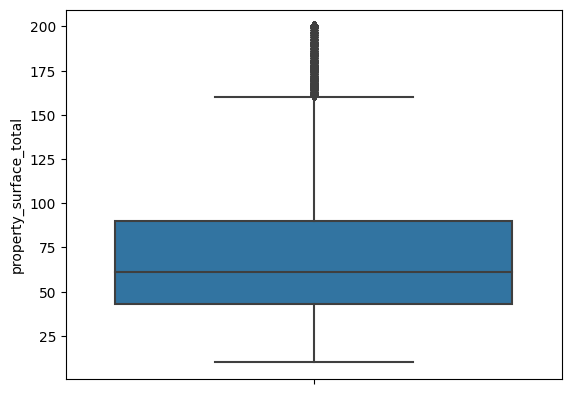

In [209]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>200].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)

In [210]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>175]
outlier.shape

(2167, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\935319298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


<AxesSubplot: ylabel='property_surface_total'>

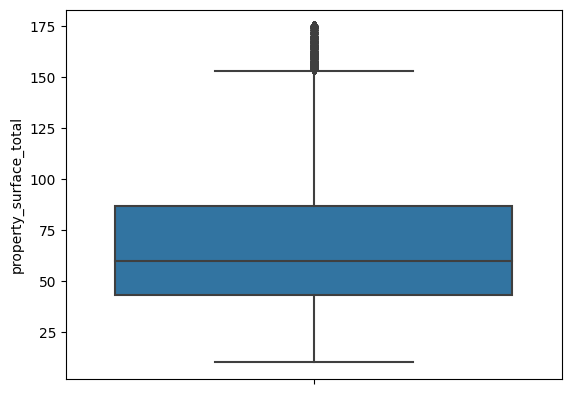

In [211]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>175].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)

In [212]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>150]
outlier.shape

(2986, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\2766508277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


<AxesSubplot: ylabel='property_surface_total'>

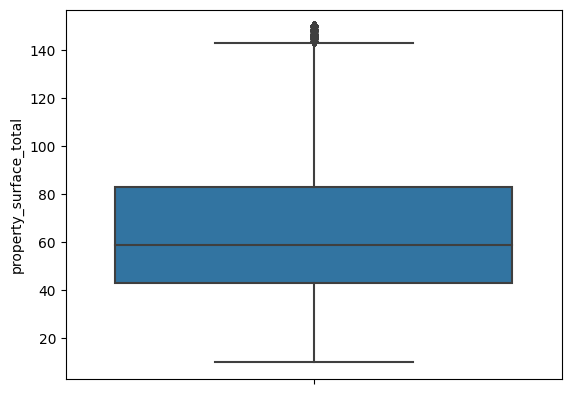

In [213]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>150].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)

In [214]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_total']>140]
outlier.shape

(1671, 21)

<AxesSubplot: ylabel='property_surface_total'>

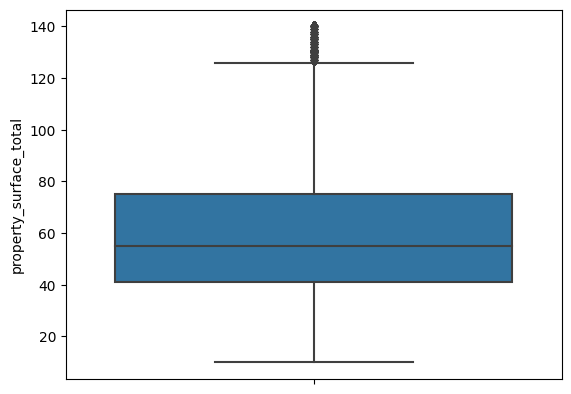

In [21]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_total']>140].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_total)

TODO: Queda algún outliner en la frontera. Habrá que sacarlo?
Calcular cantidad de outliners encontrados. Muchas dudas con estos númerso

En total eliminamos 65269 outliers que tenian un valor en property_surface_total mayor a 140. Habria que hacer un tratamiento distinto a eliminarlos porque se pierde mucha informacion al eliminar tantas muestras

##### Property surface covered

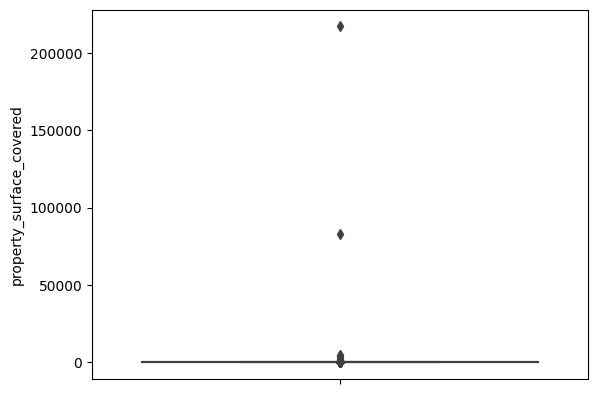

In [216]:
sns.boxplot(y=properati_limpio.property_surface_covered)
plt.show()

Al igual que en el caso anterior, encontramos outliners en la variable con valores por lo menos mayores a 50.000.

In [217]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_covered']>50000]
outlier.shape

(2, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\2282260625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


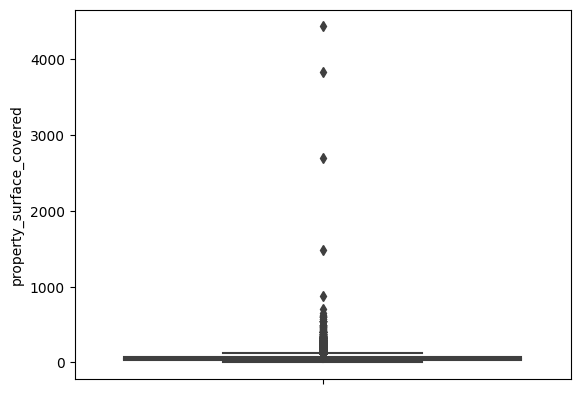

In [218]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_covered']>50000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_covered)
plt.show()

In [219]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_covered']>1000]
outlier.shape

(4, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\815969466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


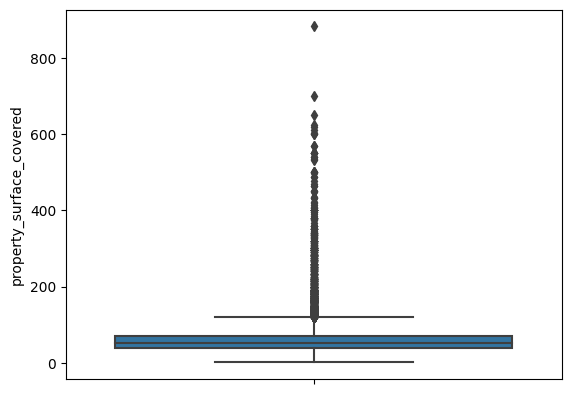

In [220]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_covered']>1000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_covered)
plt.show()

In [221]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_covered']>200]
outlier.shape

(315, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\1669996564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


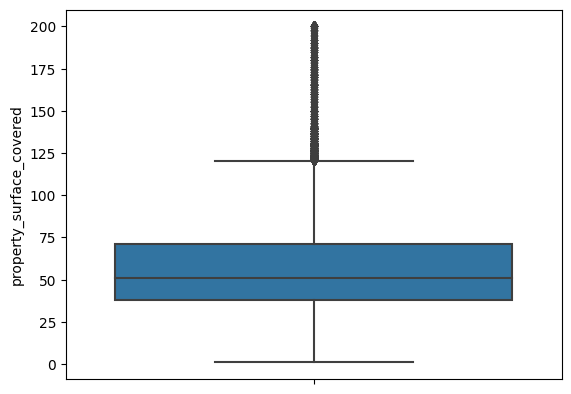

In [222]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_covered']>200].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_covered)
plt.show()

In [223]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_covered']>125]
outlier.shape

(1236, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\1093115636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


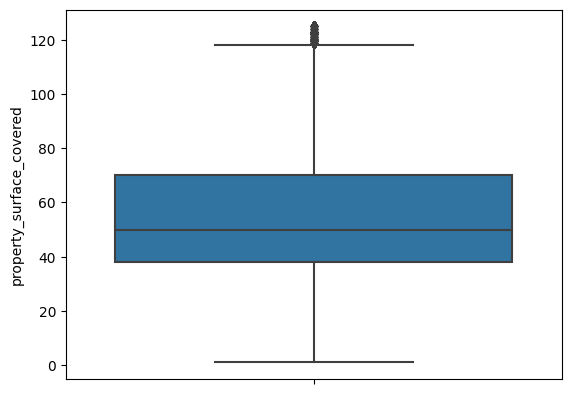

In [224]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_covered']>125].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_covered)
plt.show()

In [225]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_surface_covered']>120]
outlier.shape

(475, 21)

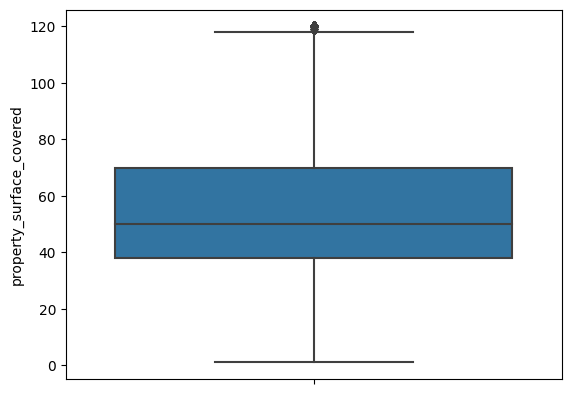

In [16]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_surface_covered']>120].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_surface_covered)
plt.show()

TODO: Queda algún outliner en la frontera. Habrá que sacarlo?
Calcular cantidad de outliners encontrados.

En total eliminamos 2032 outliers que tenian un valor en property_surface_covered mayor a 120.

##### Property price

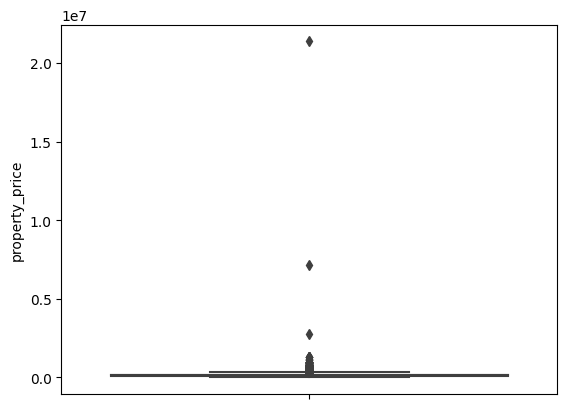

In [227]:
sns.boxplot(y=properati_limpio.property_price)
plt.show()

Existen outliers para la variable, en principio mayores a 5000000.

In [228]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_price']>5000000]
outlier.shape

(2, 21)

C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\3987753452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


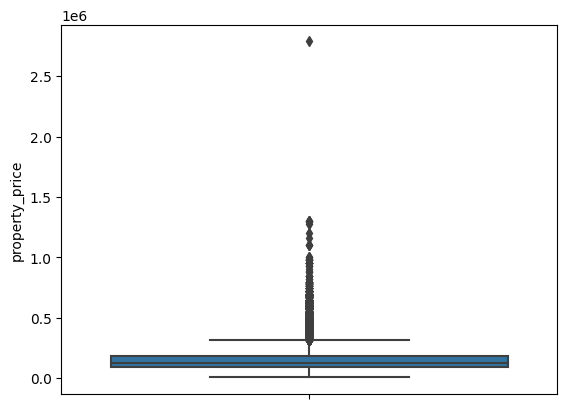

In [229]:
#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_price']>5000000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_price)
plt.show()

(700, 21)


C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\74009771.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


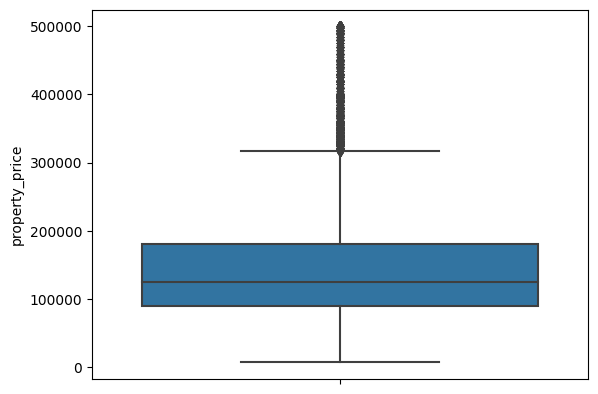

In [230]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_price']>500000]
print(outlier.shape)

#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_price']>500000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_price)
plt.show()

(913, 21)


C:\Users\meluc\AppData\Local\Temp\ipykernel_24516\814882813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_limpio.drop(indice_outlier, inplace=True)


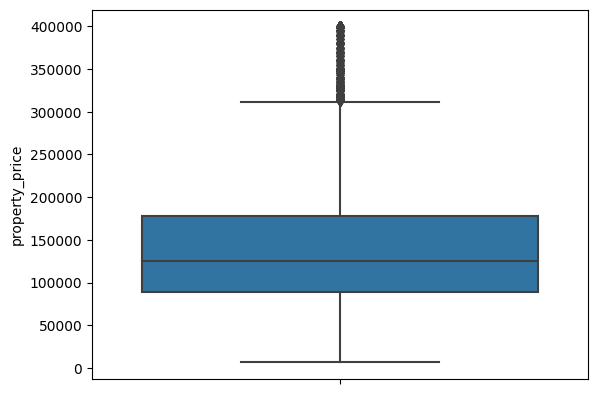

In [231]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_price']>400000]
print(outlier.shape)

#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_price']>400000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_price)
plt.show()

(4573, 20)


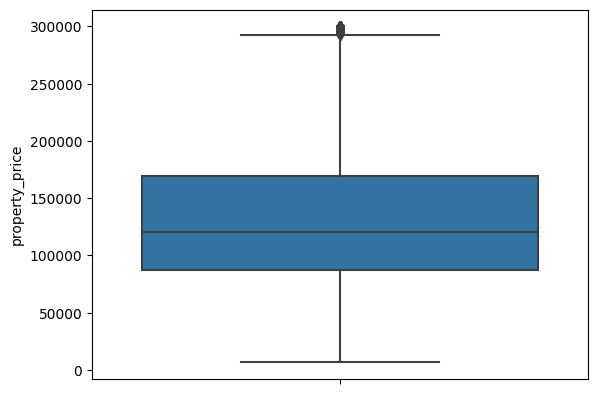

In [17]:
#Observación anómala
outlier=properati_limpio[properati_limpio['property_price']>300000]
print(outlier.shape)

#Eliminación de outlier por ínidce de fila
indice_outlier=properati_limpio[properati_limpio['property_price']>300000].index
properati_limpio.drop(indice_outlier, inplace=True)

sns.boxplot(y=properati_limpio.property_price)
plt.show()

TODO: Queda algún outliner en la frontera. Habrá que sacarlo?
Calcular cantidad de outliners encontrados.

En total eliminamos 4573 outliers que tenian un valor en property_price mayor a 300000.

Como vemos, encontramos outliers en todos los atributos, procedemos eliminando las muestras que los tienen y decidimos tratarlos de esta forma porque en todos los casos se eliminan menos del 1% del total de muestras.
Salvo por el caso de los outliers en el atributo surface_total la cual cuenta con 65269 outliers por lo que si los eliminamos estariamos perdiendo mucha informacion, en este caso conviene hacer otro tratamiento

GRAFICAMOS LA DENSIDAD DE PRECIO Y SUPERFICIE TOTAL Y EL MAPA DE CALOR CON LA COVARIANZA, SIN VALORES ATIPICOS

C:\Users\agus_\AppData\Local\Temp\ipykernel_4612\3852960646.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_corr_properati = properati_limpio.corr()


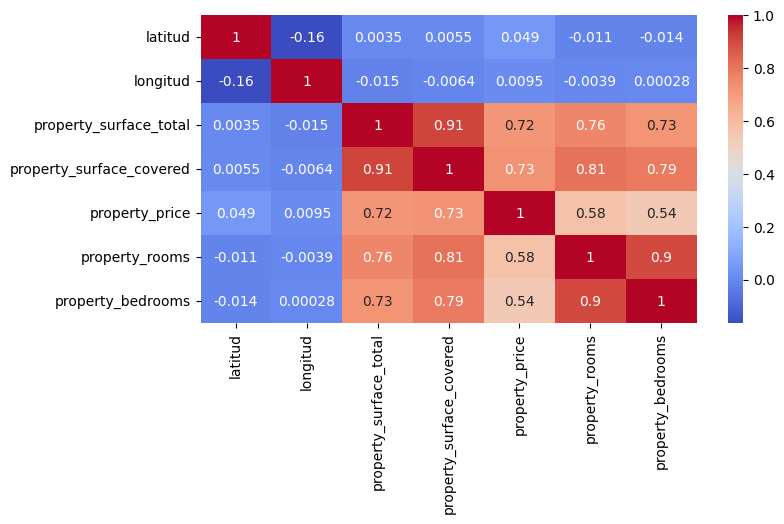

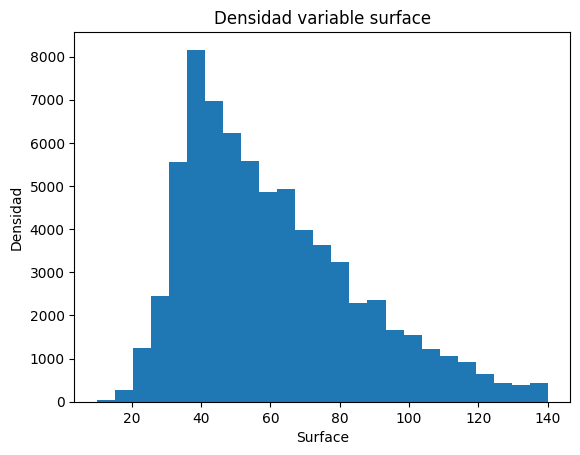

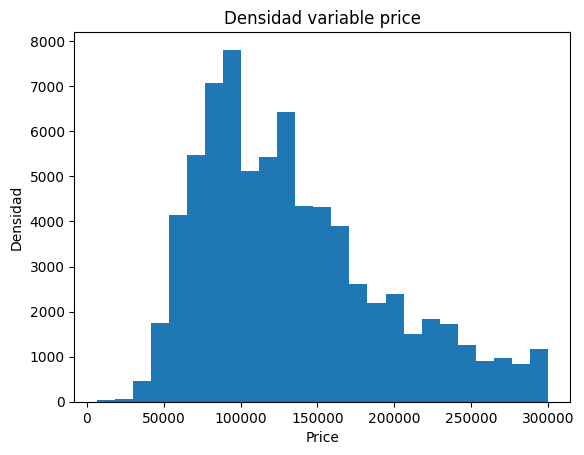

In [18]:
#Heatmap de la correlacion de Pearson entre las variables

matriz_corr_properati = properati_limpio.corr()

plt.figure(figsize = (8,4))
sns.heatmap(matriz_corr_properati, annot = True, cmap='coolwarm')
plt.show()

#Superficie
plt.title('Densidad variable surface')
plt.hist(properati_limpio['property_surface_total'], bins = 25 , alpha = 1)
plt.xlabel("Surface")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_surface_total'], kde=True, alpha = 1).set(title="Densidad variable surface",xlabel="Surface",ylabel="Densidad")
#plt.show()

#Precio
plt.title('Densidad variable price')
plt.hist(properati_limpio['property_price'], bins = 25 , alpha = 1)
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()
#sns_hist=sns.histplot(data=properati_limpio['property_price'], kde=True, alpha = 1).set(title="Densidad variable price",xlabel="Price",ylabel="Densidad")
#plt.show()

En el heatmap de la covarianza entre los atributos post eliminar los valores atipicos vemos que hay una mayor relacion entre las variables

##### Latitud Longitud?

#### Análisis multivariado

TODO: Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.

TODO: Explicar qué características poseen los datos atípicos detectados.

TODO: Decidir el tratamiento a aplicar sobre los mismos.

TODO: Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

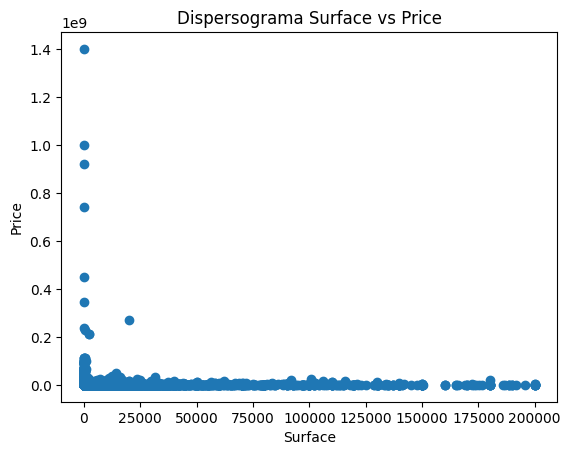

In [23]:
plt.scatter(properati["property_surface_total"],properati.property_price)
plt.title('Dispersograma Surface vs Price')
plt.xlabel('Surface')
plt.ylabel('Price')
plt.show()

### Reducción de la dimensionalidad

TODO: Crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

## Agrupamiento

In [ ]:
from sklearn.model_selection import train_test_split

train_set, train_test = train_test_split(properati_limpio, test_size = 0.2, random_state = 1)
